# 7.2 Regresion

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os.path
if not os.path.exists('mlp_helper.py'):
    !wget https://github.com/lab-ml-itba/MLP-2019/raw/master/mlp_helper.py

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from mlp_helper import draw_neural_net, return_weights_notation

Interesante articulo sobre Universal Aproximation Theorem:

http://neuralnetworksanddeeplearning.com/chap4.html

# Pruebas a realizar
- hidden units 2, 3, 6
- Activation sigmoid y relu

# Dataset

In [4]:
np.random.seed(10)
# X = np.random.normal(0, 10, 100)
X = np.linspace(-20, 20, 200)

In [5]:
sigma = 1
y = np.abs(X) + np.random.normal(0, sigma, len(X))
# y = np.cos(X/4) + np.random.normal(0, 0.01, len(X))

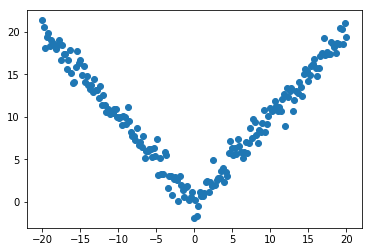

In [6]:
plt.scatter(X, y)

# Model

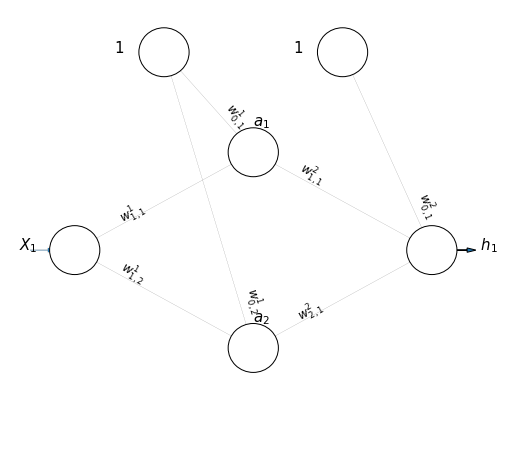

In [7]:
input_dim = 1
hidden_units = 2
outputs = 1
activation = 'relu'

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
shape = [input_dim, hidden_units, outputs]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.optimizers import Adam, SGD, rmsprop

model.compile(Adam(lr=0.1), loss='mse', metrics=['mse'])

# Entrenamiento del modelo

In [12]:
model.fit(X, y, verbose=0, epochs=500)

Instructions for updating:
Use tf.cast instead.


In [13]:
print(model.metrics_names)
print(model.evaluate(X, y))

['loss', 'mean_squared_error']
200/200 [==============================] - 0s 405us/step
[26.822522277832032, 26.822522277832032]


In [14]:
y_pred = model.predict(X)

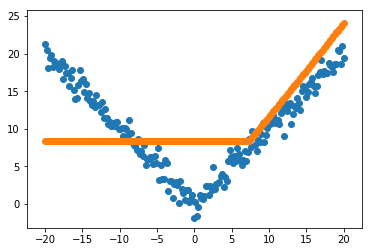

In [15]:
plt.scatter(X, y)
plt.scatter(X, y_pred)

In [16]:
model.get_weights()

[array([[0.42814037, 1.40888   ]], dtype=float32),
 array([ -6.37593 , -10.313105], dtype=float32),
 array([[0.10090556],
        [0.86742824]], dtype=float32),
 array([8.377806], dtype=float32)]

In [17]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    '''
    Obtiene el submodelo
    '''
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    
    return sub_model

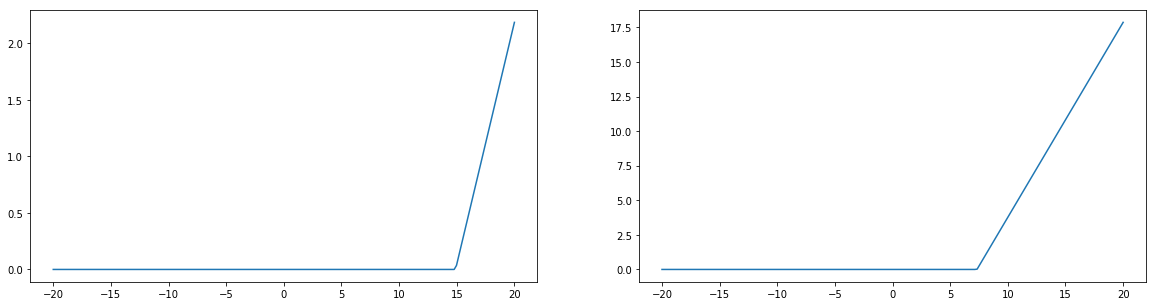

In [18]:
f, ax = plt.subplots(1, hidden_units, figsize=(20,5))
sub_models = []
preds = []
for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation, input_dim=1)
    sub_models.append(sub_model)
    preds.append(sub_model.predict(X))
    ax[i].plot(X, preds[i])

# Ejemplo con hidden_units=3 Activation sigmoid

![imagenes/sigmoid_aprox_3hidden.png](imagenes/sigmoid_aprox_3hidden.png)
![imagenes/sigmoid_aprox_3hidden_all.png](imagenes/sigmoid_aprox_3hidden_all.png)